In [78]:
from collections import defaultdict
import itertools
class Ornamentation(object):
    def __init__(self, T, ornaments = None):
        self.T = T
        self.ornaments = dict()
        for u in self.T:
            self.ornaments[u] = {u}
        if ornaments is not None:
            self.ornaments = ornaments
    def __le__(self, other):
        for u in self.T:
            if not(self.ornaments[u].issubset(other.ornaments[u])):
                return False
        return True
    def __eq__(self, other):
        for u in self.T:
            if not(self.ornaments[u] == other.ornaments[u]):
                return False
        return True    
    def __lt__(self, other):
        return (self <= other) and (self != other)
    
    def __hash__(self):
        unhash = {hash(x):x for x in self.T}
        ornaments = []
        for v in sorted(unhash):
            ornaments.append((v, tuple(sorted(
                [hash(x) for x in self.ornaments[unhash[v]]]))))
        return hash(tuple(sorted(ornaments)))
    
    def __repr__(self):
        return str(self.ornaments)
    def __str__(self):
        return str(self.ornaments)

        
def get_ornamentations_lattice(Tree):
    #T must be a rooted tree with its minimal element at the bottom
    #The vertices of T must be hashable (e.g. integers)
        
    Tree = Poset(Tree)
    ornaments = []
    G = Tree.hasse_diagram().to_undirected()
    for H in G.connected_subgraph_iterator():
        m = Tree.subposet(H).minimal_elements()[0]
        ornaments.append((m, set(H)))
    base_set = set(Tree)
        
    unhash = dict()
    for x in base_set:
        unhash[hash(x)] = x
        
    new_ornaments = [(hash(orn[0]), {hash(y) for y in orn[1]}) for orn in ornaments]
    
    ornament_graph = defaultdict(list)
    for x, y in itertools.combinations(new_ornaments, r = 2):
        if x[0] == y[0]:
            continue
        
        S = set(x[1])
        T = set(y[1])
        compat = True
        if len(S.intersection(T)) == 0:
            ornament_graph[(x[0], tuple(sorted(x[1])))].append((y[0], tuple(sorted(y[1]))))
        if not((y[0] in S and not(T.issubset(S))) or (x[0] in T and not(S.issubset(T)))):
            ornament_graph[(x[0], tuple(sorted(x[1])))].append((y[0], tuple(sorted(y[1]))))
    ornamentations = Graph(ornament_graph).cliques_maximal()
    out = []
    for orn in ornamentations:
        obj = Ornamentation(Tree)
        for t in orn:
            obj.ornaments[unhash[t[0]]] = set([unhash[x] for x in t[1]])
        out.append(obj)
    d = dict()
    ornamentations = out
    for orn in ornamentations:
        d[orn] = []
    for o1 in ornamentations:
        for o2 in ornamentations:
            if o1 < o2:
                d[o1].append(o2)
                
    return LatticePoset(d)
        
        


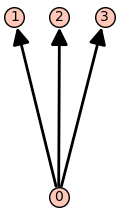

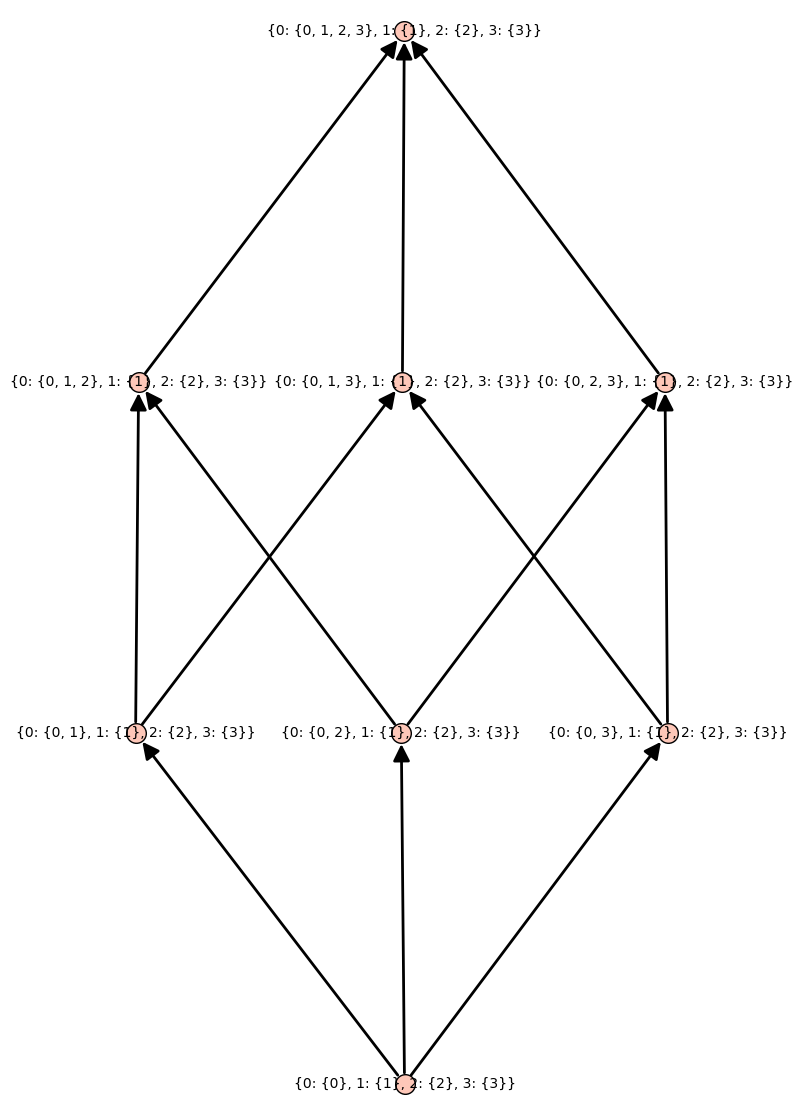

In [4]:
#Boolean Lattice B_3
d = dict()
d[0] = [1,2,3]
T = Poset(d)
T.show(figsize = 3)
get_ornamentations_lattice(T).show(figsize = 15)

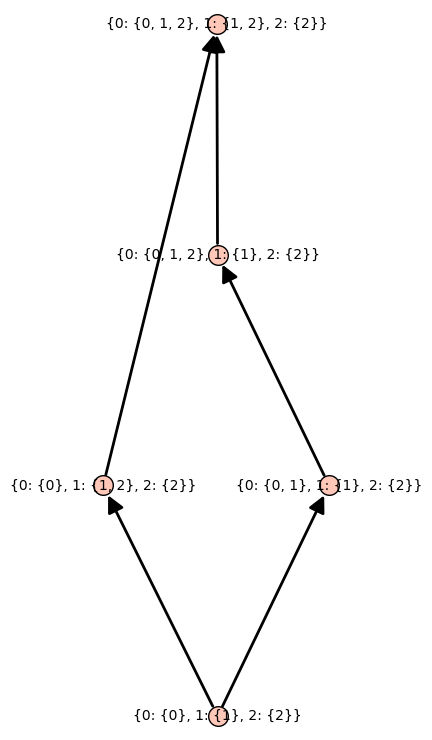

In [166]:
#Tamari Lattice for 3 dimensions
d = dict()
d[0] = [1]
d[1] = [2]
T = Poset(d)
T.show(figsize = 3)
get_ornamentations_lattice(T).show(figsize = 10)

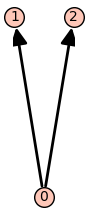

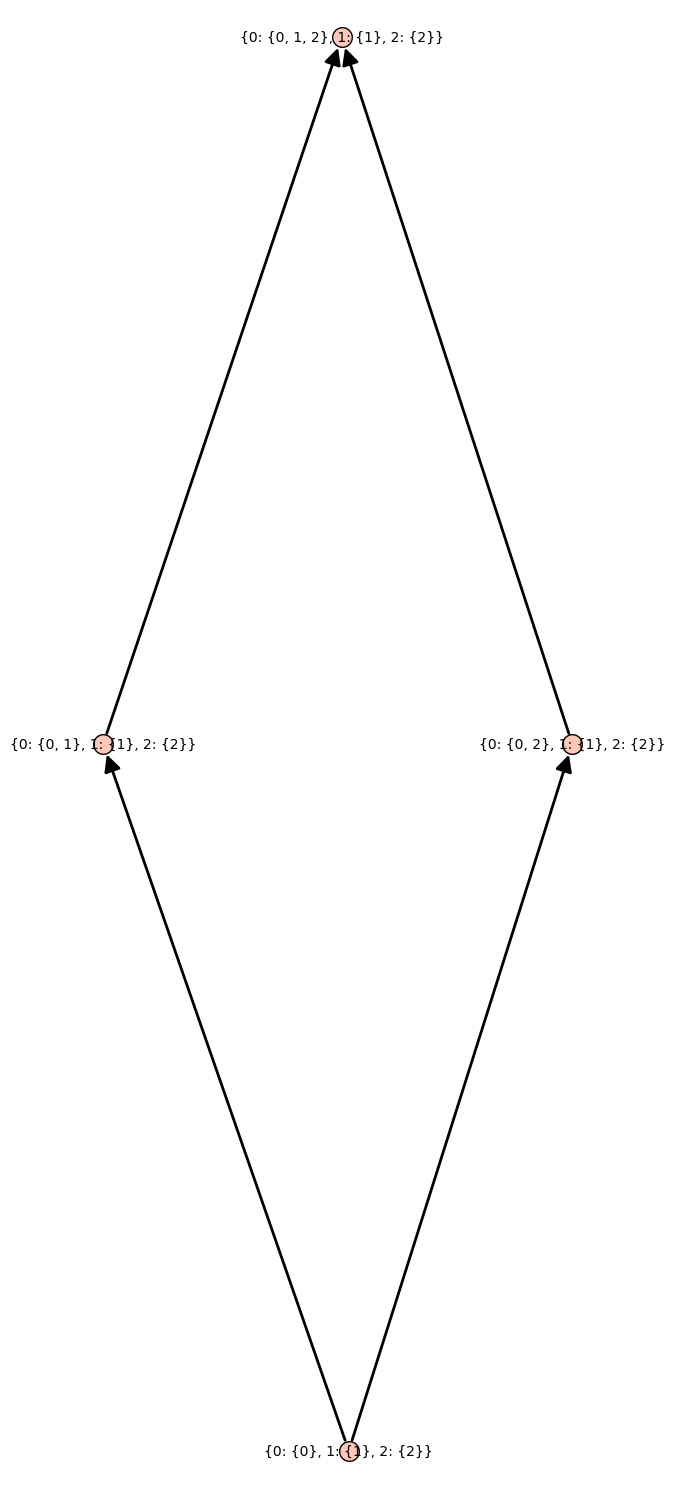

In [76]:
d = dict()
d[0] = [1,2]
T = Poset(d)
T.show(figsize = 3)
L = get_ornamentations_lattice(T)
L.show(figsize = 20)


In [168]:
#printing ornaments
G = T.hasse_diagram().to_undirected()
for x in G.connected_subgraph_iterator():
    print(list(x))

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 3]
[1]
[1, 2]
[1, 2, 3]
[1, 3]
[2]
[3]


In [169]:
#various properties of ornamentation lattices
print(L.is_semidistributive())
print(L.is_trim())
print(L.is_complemented())

True
True
True


In [170]:
#switching it to list so I can use the functions
elements = L.list()

#printing meet
print("The meet is: ", L.meet(elements[1],elements[4]))

#printing join
print("The join is: ",L.join(elements[1],elements[4]))

#printing minimal element
print("The unique minimal element is: ", L.bottom())

#printing maximal element
print("The unique maximal element is: ", L.top())

The meet is:  {0: {0}, 1: {1}, 2: {2}, 3: {3}}
The join is:  {0: {0, 1, 2}, 1: {1, 2}, 2: {2}, 3: {3}}
The unique minimal element is:  {0: {0}, 1: {1}, 2: {2}, 3: {3}}
The unique maximal element is:  {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}


In [171]:
orn = Ornamentation(T, ornaments = {0: {0}, 1: {1,2,3}, 2:{2}, 3:{3}})
L.upper_covers(orn)

[{0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}]

In [172]:
#finding maximal chains
L.maximal_chains()

[[{0: {0}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0}, 1: {1, 2}, 2: {2}, 3: {3}},
  {0: {0}, 1: {1, 2, 3}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}],
 [{0: {0}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0}, 1: {1, 2}, 2: {2}, 3: {3}},
  {0: {0, 1, 2}, 1: {1, 2}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}],
 [{0: {0}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0}, 1: {1, 3}, 2: {2}, 3: {3}},
  {0: {0}, 1: {1, 2, 3}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}],
 [{0: {0}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0}, 1: {1, 3}, 2: {2}, 3: {3}},
  {0: {0, 1, 3}, 1: {1, 3}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 3}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}],
 [{0: {0}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2}, 1: {1, 2}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2}, 2: {2}, 3: {3}},
  {0: {0, 1,

In [173]:
#finding maximal length chains
max_length = L.height()
max_chains = L.maximal_chains()
max_len_chains = [] #made an empty list to append later
for chain in max_chains:
    if len(chain) == max_length:
        max_len_chains.append(chain)
max_len_chains

[[{0: {0}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2}, 1: {1, 2}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}],
 [{0: {0}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}],
 [{0: {0}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 3}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 2, 3}, 2: {2}, 3: {3}}],
 [{0: {0}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 3}, 1: {1}, 2: {2}, 3: {3}},
  {0: {0, 1, 3}, 1: {1, 3}, 2: {2}, 3: {3}},
  {0: {0, 1, 2, 3}, 1: {1, 3}, 2: {2}, 3: {3}},
  {0

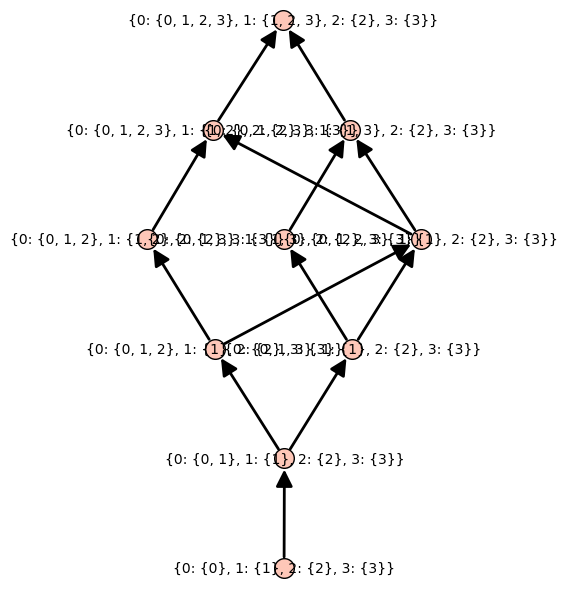

In [176]:
#this is to get the spine
elements = set()
for chain in max_len_chains:
    elements.update(chain) 

relations = []
for chain in max_len_chains:
    for i in range(len(chain) - 1): 
        relations.append((chain[i], chain[i + 1]))

P_new = Poset((elements, relations))
P_new.show(figsize = 8)

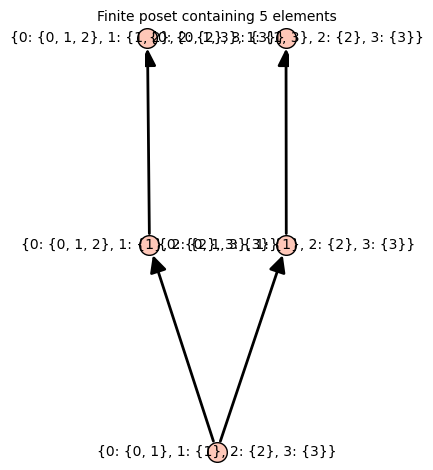

In [177]:
L = LatticePoset(P_new)
L.join_irreducibles_poset()

In [159]:
# cover_relations = P_new.cover_relations()
# covered_by = {} 

# for x in P_new:
#     covered_by[x] = 0

# for pair in cover_relations: 
#     lower, upper = pair 
#     covered_by[upper] += 1 

# join_irreducibles = set()
# for x in P_new:
#     if covered_by[x] == 1:  
#         join_irreducibles.add(x) 
        
# relations = []  
# for x, y in cover_relations:
#     if x in join_irreducibles and y in join_irreducibles:
#         relations.append((x, y)) 
# P_join_irreducible = Poset((join_irreducibles, relations))
# P_join_irreducible.show(figsize=5)


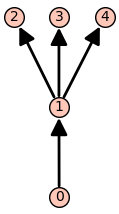

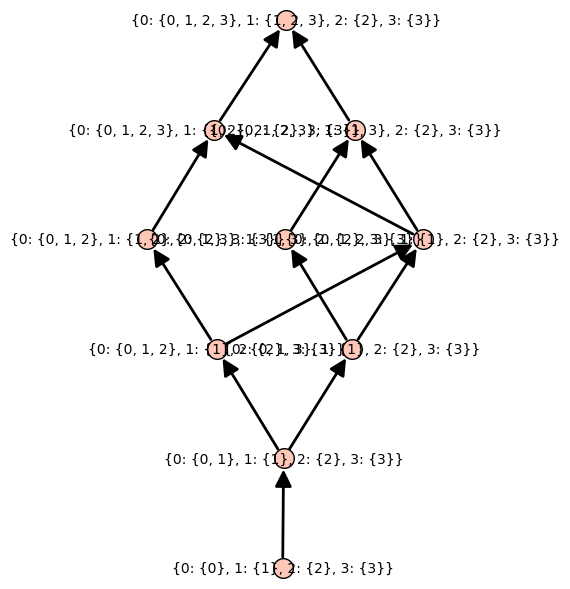

In [178]:
d = dict()
d[0] = [1]
d[1] = [2,3,4]
T = Poset(d)
T.show(figsize = 3)
L = get_ornamentations_lattice(T)

elements = set()
for chain in max_len_chains:
    elements.update(chain) 

relations = []
for chain in max_len_chains:
    for i in range(len(chain) - 1): 
        relations.append((chain[i], chain[i + 1]))

P_new = Poset((elements, relations))
P_new.show(figsize = 8)


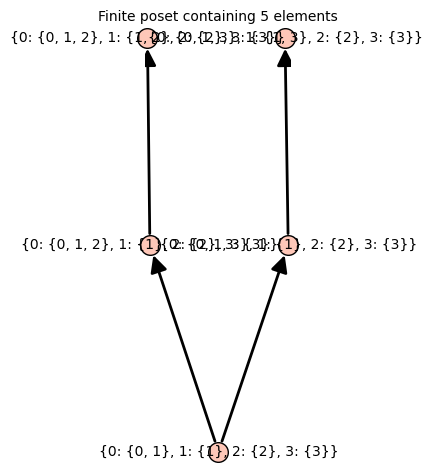

In [179]:
L = LatticePoset(P_new)
L.join_irreducibles_poset()

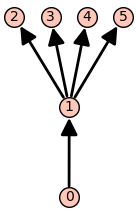

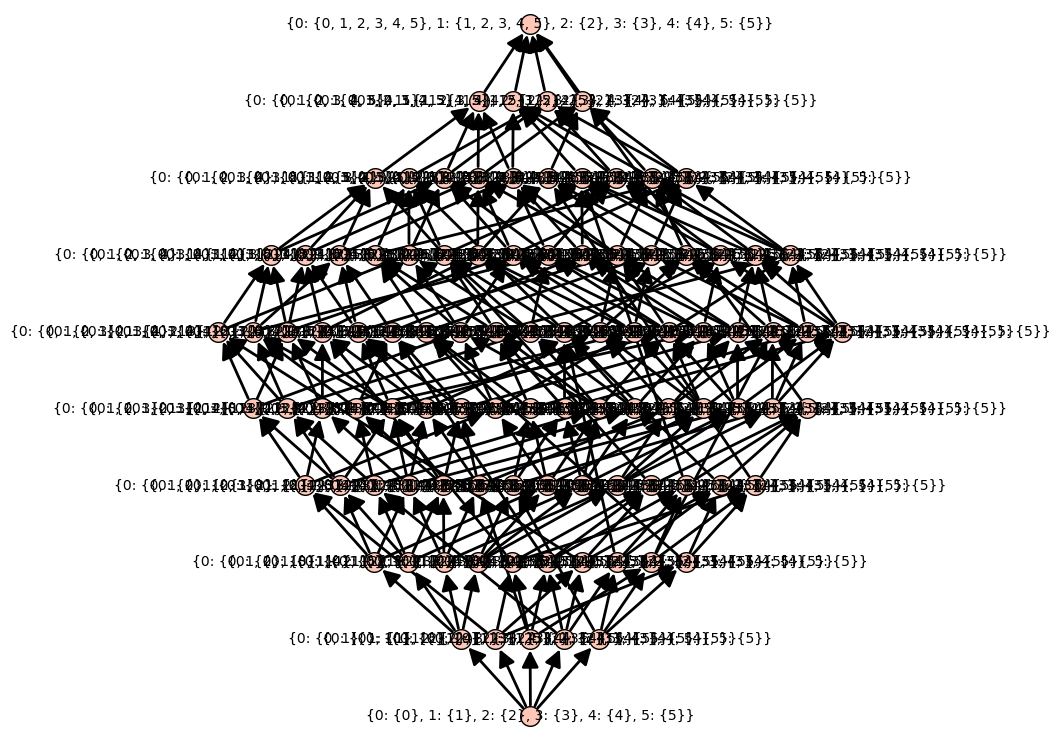

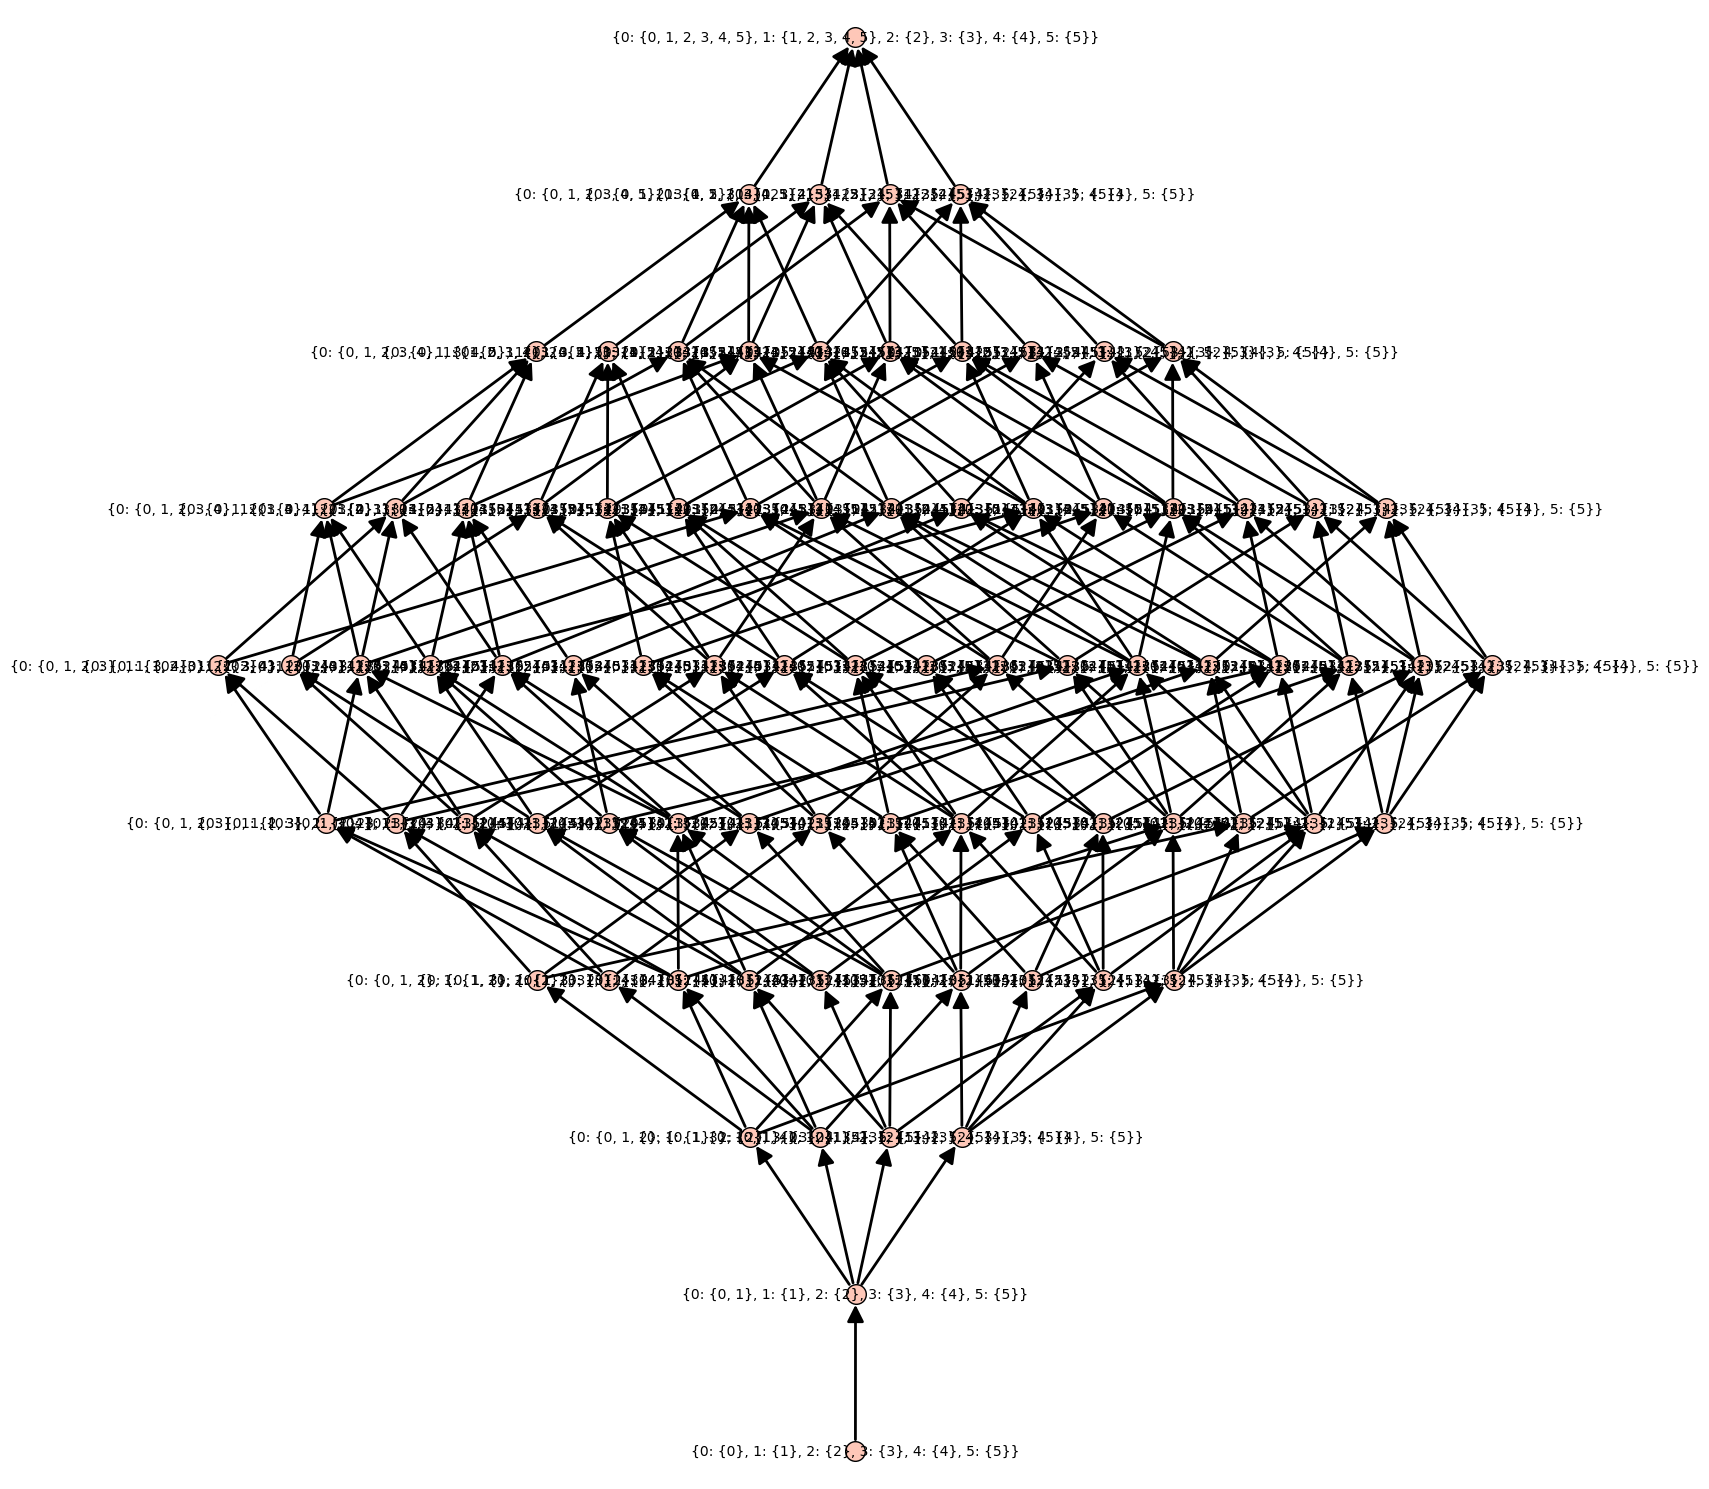

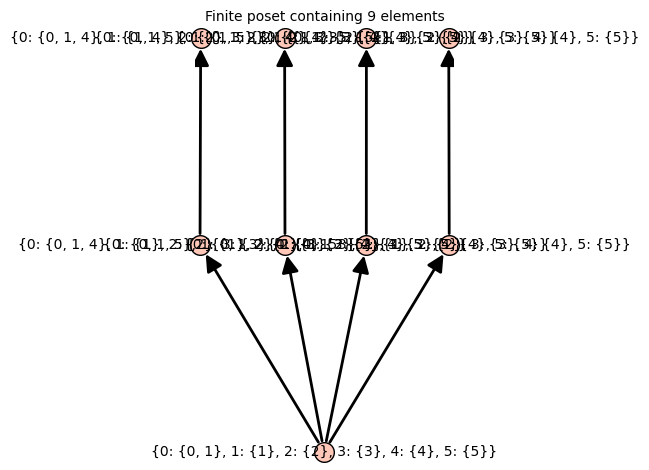

In [183]:
d = dict()
d[0] = [1]
d[1] = [2,3,4,5]
T = Poset(d)
T.show(figsize = 3)

L = get_ornamentations_lattice(T)
L.show(figsize = 10)

max_length = L.height()
max_chains = L.maximal_chains()
max_len_chains = [] #made an empty list to append later
for chain in max_chains:
    if len(chain) == max_length:
        max_len_chains.append(chain)
max_len_chains 

elements = set()
for chain in max_len_chains:
    elements.update(chain) 

relations = []
for chain in max_len_chains:
    for i in range(len(chain) - 1): 
        relations.append((chain[i], chain[i + 1]))

P_new = Poset((elements, relations))
P_new.show(figsize = 20)

L = LatticePoset(P_new)
L.join_irreducibles_poset()

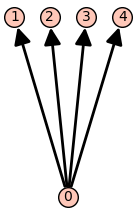

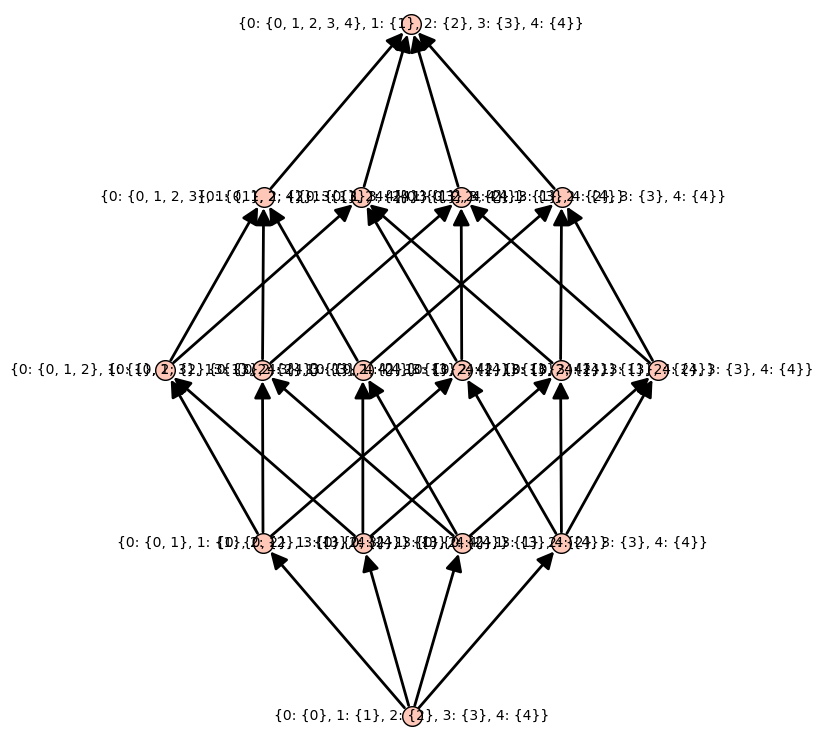

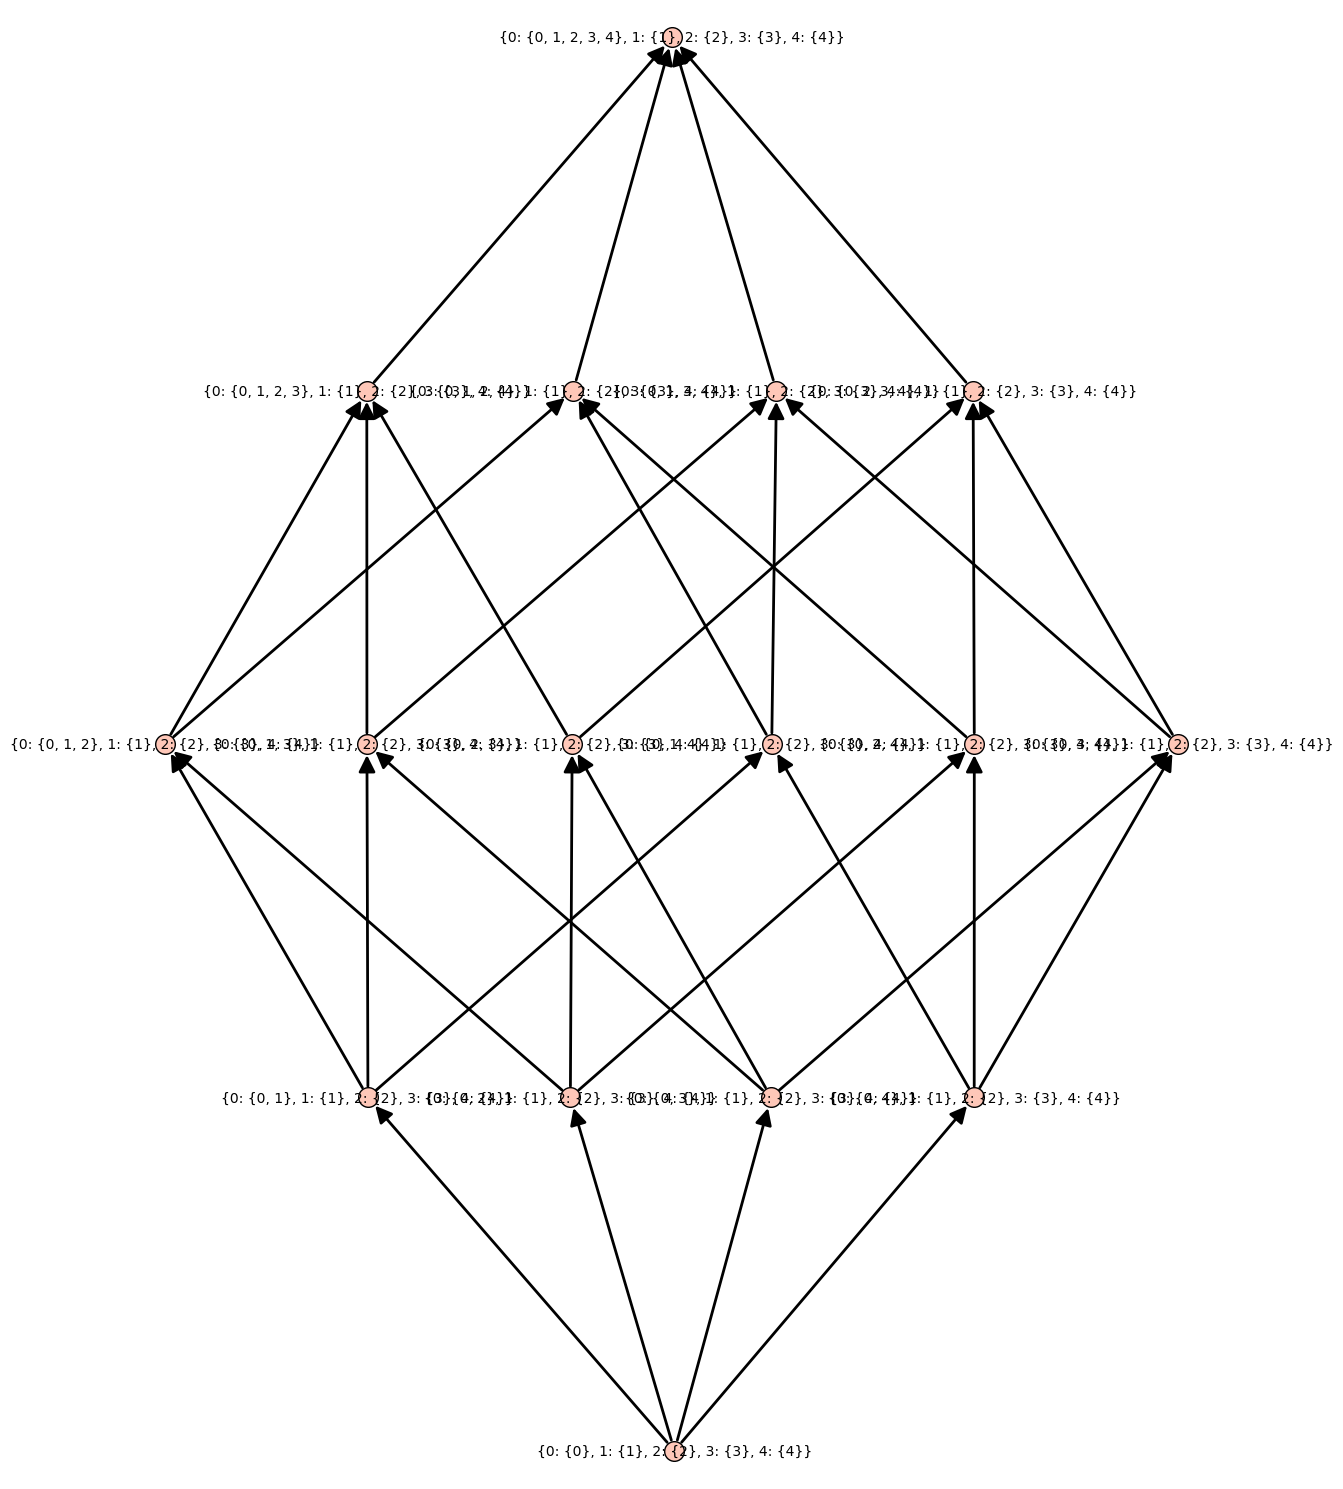

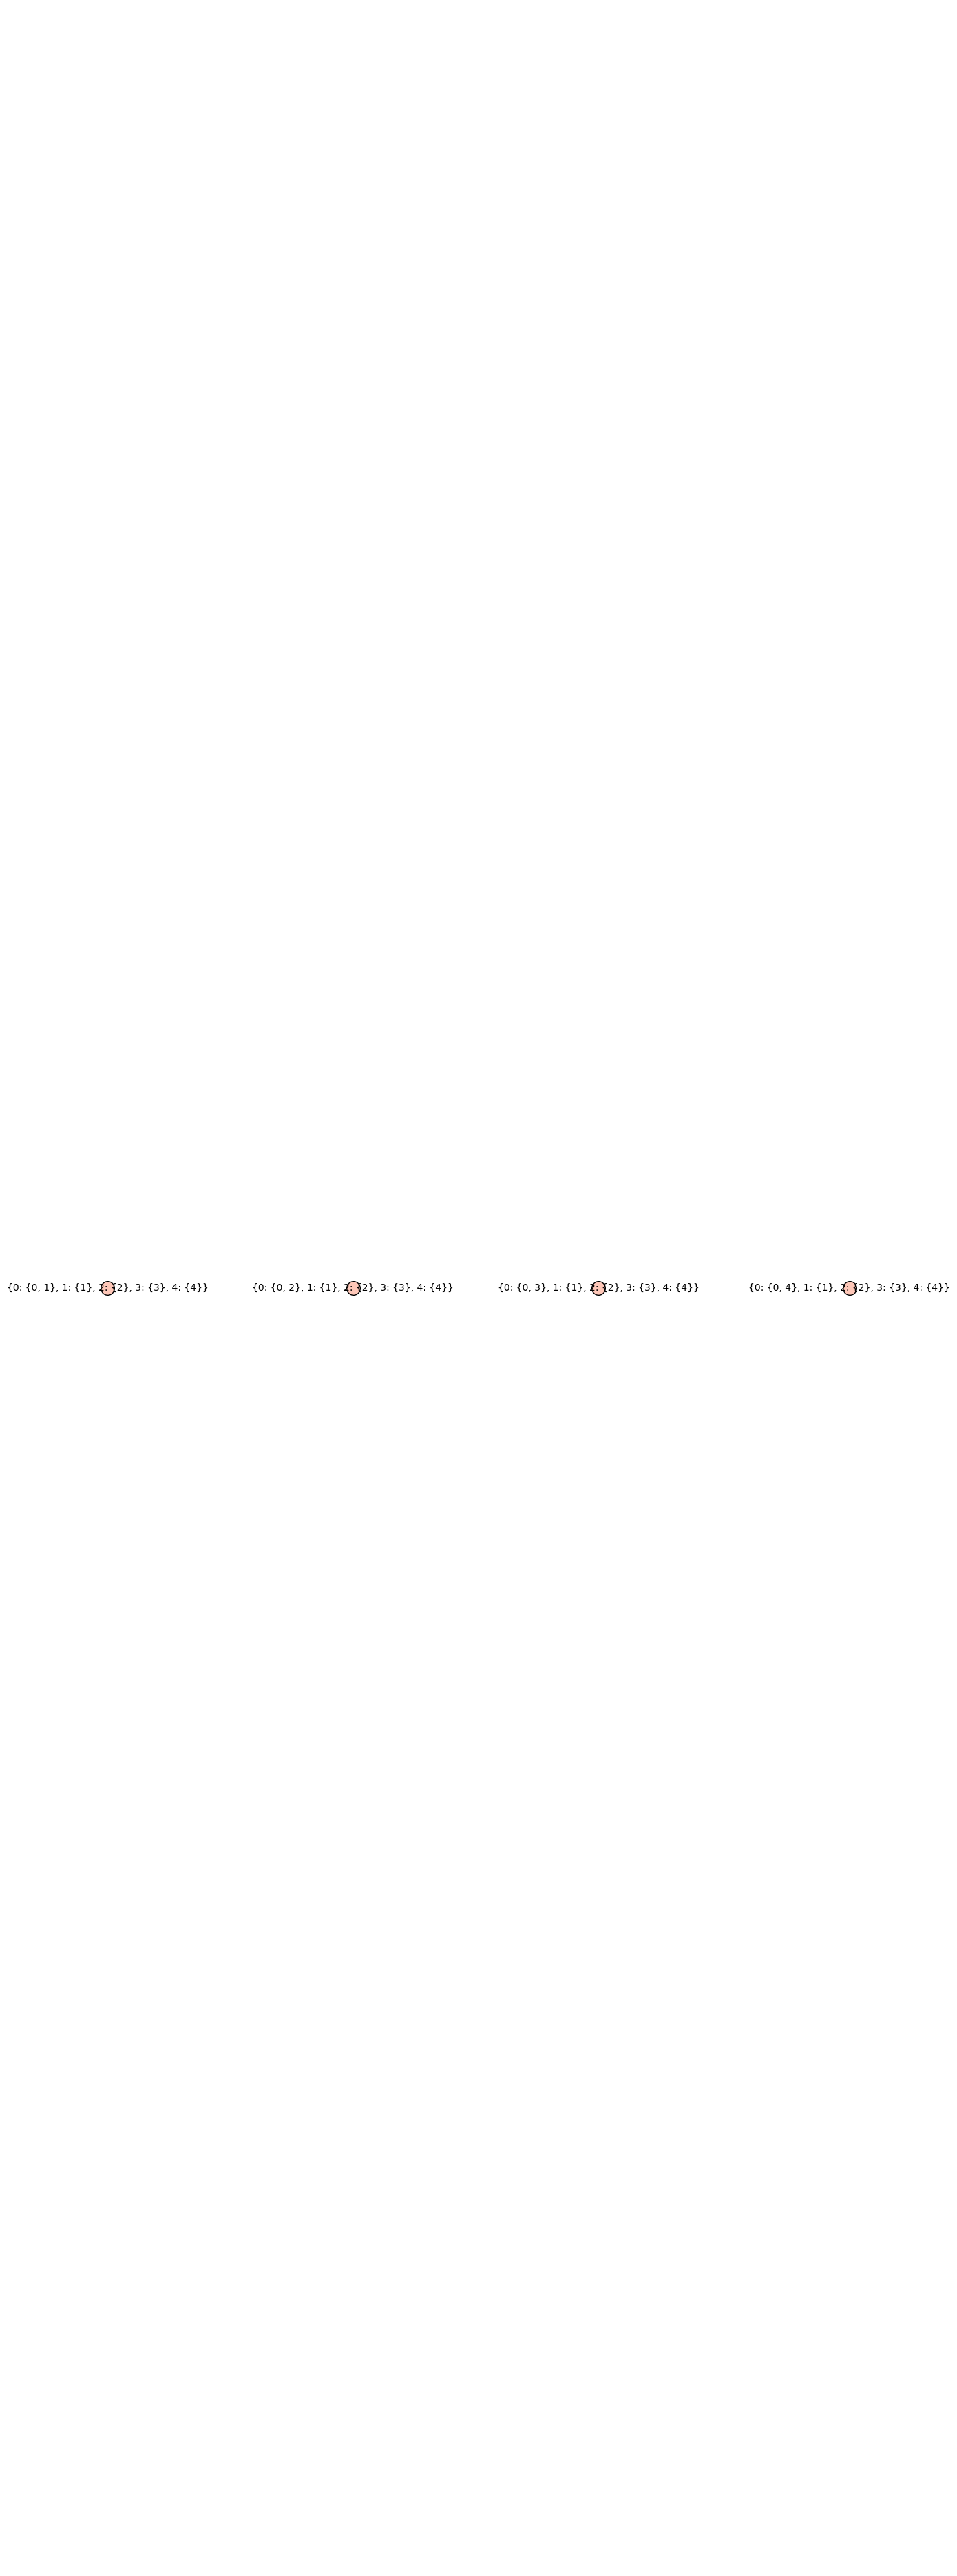

In [31]:
d = dict()
d[0] = [1,2,3,4]
T = Poset(d)
T.show(figsize = 3)

L = get_ornamentations_lattice(T)
L.show(figsize = 10)

max_length = L.height()
max_chains = L.maximal_chains()
max_len_chains = [] #made an empty list to append later
for chain in max_chains:
    if len(chain) == max_length:
        max_len_chains.append(chain)
max_len_chains 

elements = set()
for chain in max_len_chains:
    elements.update(chain) 

relations = []
for chain in max_len_chains:
    for i in range(len(chain) - 1): 
        relations.append((chain[i], chain[i + 1]))

P_new = Poset((elements, relations))
P_new.show(figsize = 20)

L = LatticePoset(P_new)
L.join_irreducibles_poset().show(figsize = 50)


In [137]:
def Ordered_to_Rooted(n):
    return [RootedTree(S) for S in OrderedTrees(n)]

def statistic(tree):
    return Ordered_to_Rooted(tree.node_number()).count(RootedTree(tree))


parent_initializer = OrderedTrees
element_repr = repr
levels = [2, 3, 4, 5, 6, 7]
for level in levels:
    for elt in parent_initializer(level):
        print('%s  =>  %s' % (element_repr(elt), length_of_max_length_chain(elt.to_poset().dual())))

[[]]  =>  2
[[], []]  =>  3
[[[]]]  =>  4
[[], [], []]  =>  4
[[], [[]]]  =>  5
[[[]], []]  =>  5
[[[], []]]  =>  6
[[[[]]]]  =>  7
[[], [], [], []]  =>  5
[[], [], [[]]]  =>  6
[[], [[]], []]  =>  6
[[], [[], []]]  =>  7
[[], [[[]]]]  =>  8
[[[]], [], []]  =>  6
[[[]], [[]]]  =>  7
[[[], []], []]  =>  7
[[[[]]], []]  =>  8
[[[], [], []]]  =>  8
[[[], [[]]]]  =>  9
[[[[]], []]]  =>  9
[[[[], []]]]  =>  10
[[[[[]]]]]  =>  11
[[], [], [], [], []]  =>  6
[[], [], [], [[]]]  =>  7
[[], [], [[]], []]  =>  7
[[], [], [[], []]]  =>  8
[[], [], [[[]]]]  =>  9
[[], [[]], [], []]  =>  7
[[], [[]], [[]]]  =>  8
[[], [[], []], []]  =>  8
[[], [[[]]], []]  =>  9
[[], [[], [], []]]  =>  9
[[], [[], [[]]]]  =>  10
[[], [[[]], []]]  =>  10
[[], [[[], []]]]  =>  11
[[], [[[[]]]]]  =>  12
[[[]], [], [], []]  =>  7
[[[]], [], [[]]]  =>  8
[[[]], [[]], []]  =>  8
[[[]], [[], []]]  =>  9
[[[]], [[[]]]]  =>  10
[[[], []], [], []]  =>  8
[[[[]]], [], []]  =>  9
[[[], []], [[]]]  =>  9
[[[[]]], [[]]]  =>  10


In [26]:
def length_of_max_length_chain(T):
    L = get_ornamentations_lattice(T)
    return L.height()

# def get_max_len_chains(Tree):
#     L = get_ornamentations_lattice(Tree)
#     max_chains = L.maximal_chains()
#     max_len_chains = []
#     for chain in max_chains:
#         if len(chain) == length_of_max_length_chain(Tree):
#             max_len_chains.append(chain)
#     return max_len_chains

def get_max_len_chains(tree):
   L = get_ornamentations_lattice(tree)
   max_chains = L.maximal_chains()
   max_len = max(len(chain) for chain in max_chains)
   max_length_chains = [chain for chain in max_chains if len(chain) == max_len]
   return max_length_chains

def num_of_max_len_chains(Tree):
    return len(get_max_len_chains(Tree))


# def get_spine(Tree):
#     maxlength = get_max_len_chains(Tree)
#     elements = set()
#     for chain in maxlength:
#         elements.update(chain) 
#     return elements

def get_spine(T):
   mlchains = get_max_len_chains(T)
   spine = set()
   for chain in mlchains:
      for ornamentation in chain:
         spine.add(ornamentation)
   spine_list = list(spine)
   return spine_list
    
def num_elements_of_spine(Tree):
    return len(get_spine(Tree))

def get_join_irreducibles(Tree):
    elements = get_spine(Tree)
    max_len_chains = get_max_len_chains(Tree)
    
    relations = []
    for chain in max_len_chains:
        for i in range(len(chain) - 1):
            relations.append((chain[i], chain[i + 1]))
            
    P_new = Poset((elements, relations))
    
    L = LatticePoset(P_new)
    L.join_irreducibles_poset()
    joinirr = L.join_irreducibles_poset()
    return joinirr


def num_elements_joinirr(Tree):
    return len(get_join_irreducibles(Tree))

def num_ornamentations(Tree):
    lattice = get_ornamentations_lattice(Tree)
    return len(lattice)

In [8]:
tree = choice(OrderedTrees(5))
tree

[[], [], [], []]

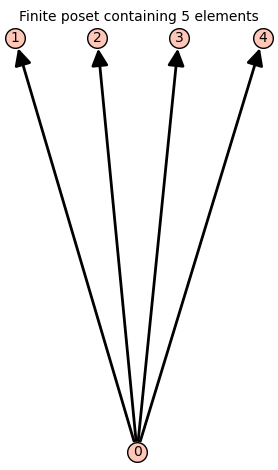

In [9]:
tree.to_poset().dual()

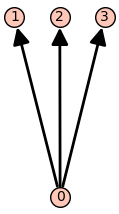

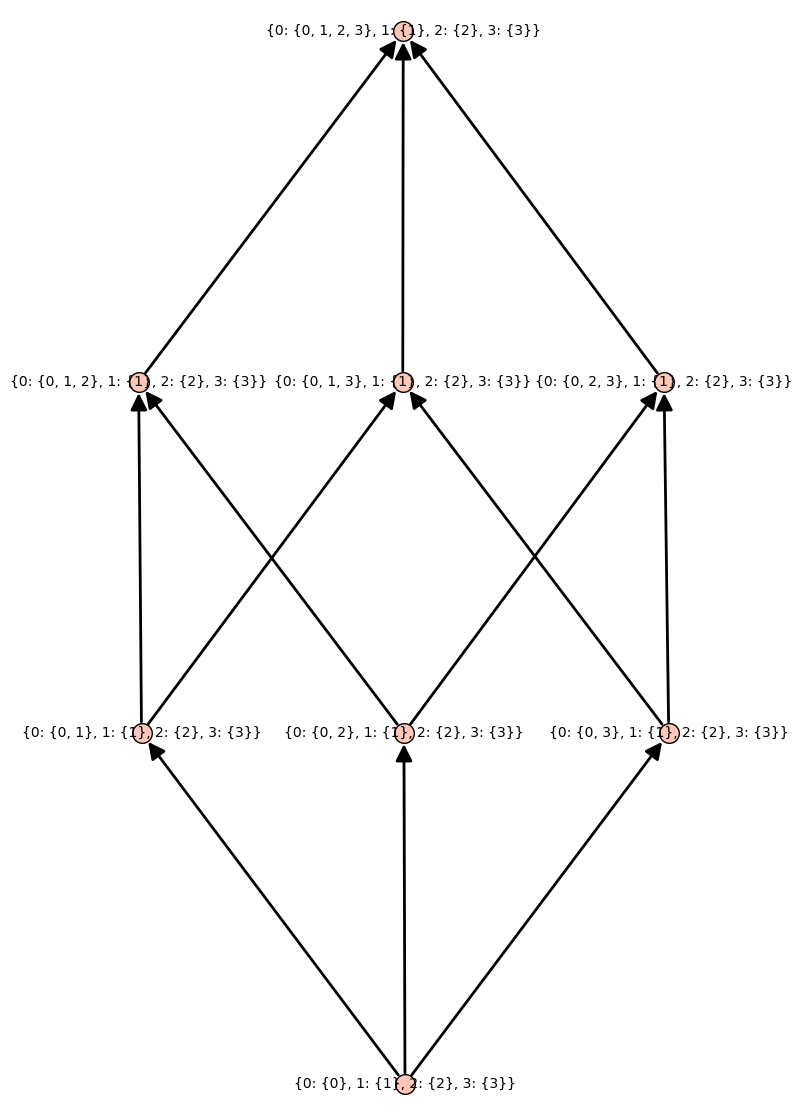

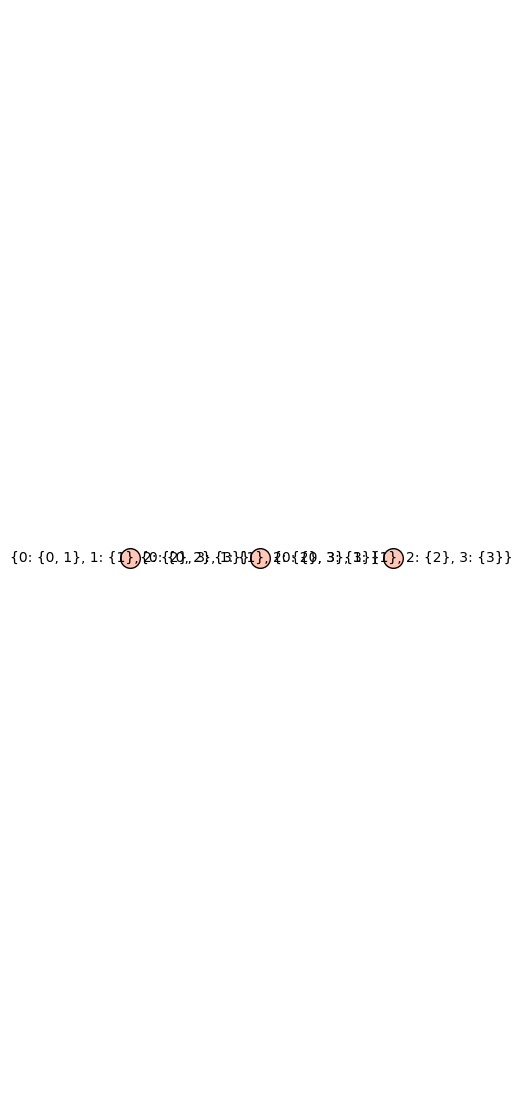

In [13]:
d = dict()
d[0] = [1,2,3]
T = Poset(d)
T.show(figsize = 3)
get_ornamentations_lattice(T).show(figsize = 15)
get_join_irreducibles(T).show(figsize = 15)

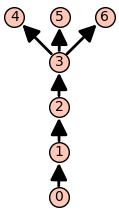

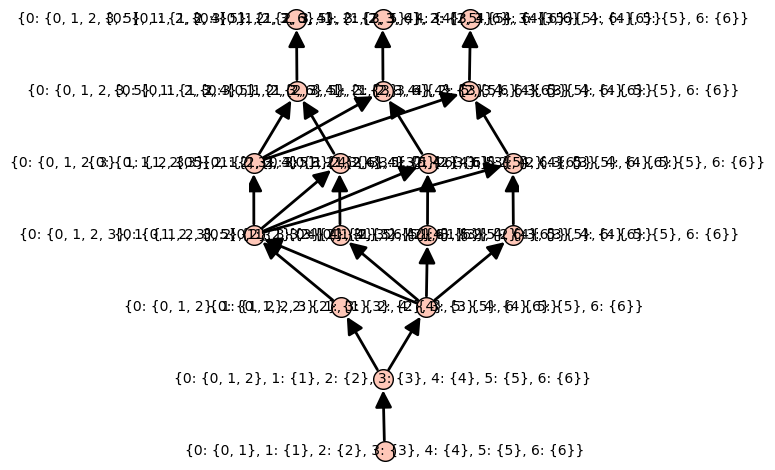

In [134]:
d = dict()
d[0] = [1]
d[1] = [2]
d[2] = [3]
d[3] = [4,5,6]

T = Poset(d)
T.show(figsize = 3)

P = get_join_irreducibles(T)
P.show()

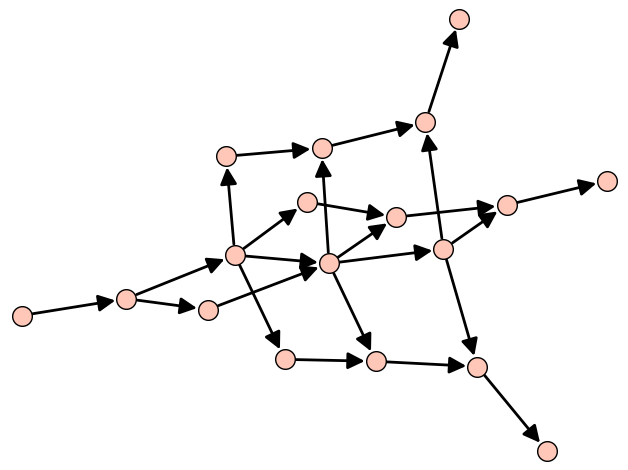

In [144]:
P.hasse_diagram().plot(vertex_labels = False)

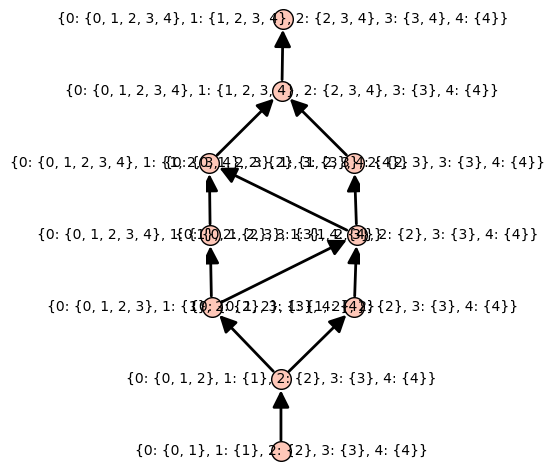

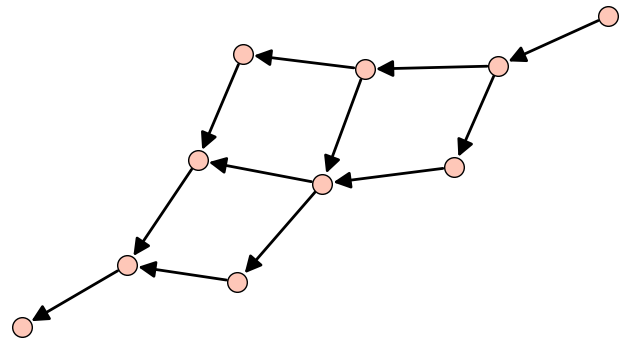

In [131]:
d = dict()
d[0] = [1]
d[1] = [2]
d[2] = [3]
d[3] = [4,5]

T = Poset(d)
T.show(figsize = 3)

P = get_join_irreducibles(T)
P.show()
P.hasse_diagram().plot(vertex_labels = False)

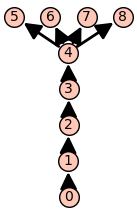

KeyboardInterrupt: 

In [124]:
d = dict()
d[0] = [1]
d[1] = [2]
d[2] = [3]
d[3] = [4]
d[4] = [5,6,7,8]
T = Poset(d)
T.show(figsize = 3)

len(get_ornamentations_lattice(T))

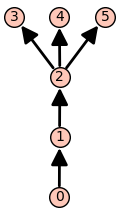

74

In [20]:
d = dict()
d[0] = [1]
d[1] = [2]
d[2] = [3,4,5]
T = Poset(d)
T.show(figsize = 3)

num_elements_of_spine(T)

In [38]:
def if_spine(ornamentation, T):
   spine = get_spine(T)
   if ornamentation in spine:
      return True
   return False

def hypothesis_classification(ornamentation, T):
   for node in T:
      node_image = ornamentation.ornaments[node]
      for child in T[node]:

         child_image = ornamentation.ornaments[child]

         if len(child_image) != 1 and not child_image.issubset(node_image):
            return False
   return True
d = dict()
d[0] = [1]
d[1] = [2,3,4,5,6,7]

T = Poset(d)


spine = get_spine(T)

# for i in spine:
#     print(hypothesis_classification(i, d))

ornamentations = list(get_ornamentations_lattice(T))

hypothesis_spine = []
for i in ornamentations:
    if (hypothesis_classification(i, d)):
        hypothesis_spine.append(i)

for i in spine:
    if i not in hypothesis_spine:
        print("failed")


for i in hypothesis_spine:
    if i not in spine:
        print("failed")

len(hypothesis_spine)

KeyboardInterrupt: 

In [ ]:

get_join_irreducibles(Tree)